# ![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignment 7

The goal of this assignment is to calculate the doubling time of the E. Coli bacteria. The doubling time is the time it takes for a bacteria culture to double its size.

The early growth phase of a bacterial culture can be stated mathematically as:

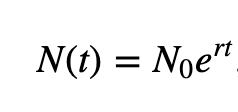

where  N(t)  is the number of cells at time  t ,  N0  is the initial number of cells and  r  is the growth rate in dimensions of time.

We will use a a series of images E. coli cells growing on a hard agar subtstrate at 100x magnification taken at 5 minutes intervals.


Let's start by importing the necessary libraries

In [1]:
import glob # For parsing directories and files
import skimage.io # For basic image processing
import matplotlib.pyplot as plt # For plotting
import numpy as np
from scipy import ndimage

Copy the zip file with the images from the assignment in the same location where you have this notebook and uncompress it.

The uncompressed file contains images coming from 2 different capturing techniques, capturing the fluorescence of different proteins. 

We will use the TRITC files.

First we will load the TRITC files using glob into a variable called files:

In [2]:
### TO BE DONE BY STUDENT###
# 1 line of code
# 2 points

files =  glob.glob("2016-04-03-muir_dryrun/*TRITC*")

In [3]:
len(files)

30

In [4]:
files

['2016-04-03-muir_dryrun/img_000000004_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000013_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000017_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000000_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000010_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000007_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000029_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000003_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000014_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000009_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000027_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000023_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000024_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000019_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000020_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000021_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000018_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000025_TRITC_000.tif',
 '2016-04-




Files are not sorted, so let's do it:

In [5]:
### TO BE DONE BY STUDENT###
## WE SORT BECAUSE WE WANT TO SEE THE EVOLUTION
# 1 line of code
# 2 points

files = sorted([x for x in files])

In [6]:
files

['2016-04-03-muir_dryrun/img_000000000_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000001_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000002_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000003_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000004_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000005_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000006_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000007_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000008_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000009_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000010_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000011_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000012_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000013_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000014_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000015_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000016_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000017_TRITC_000.tif',
 '2016-04-

We have 30 images, let's see them all in a 6x5 grid of 30x24 size

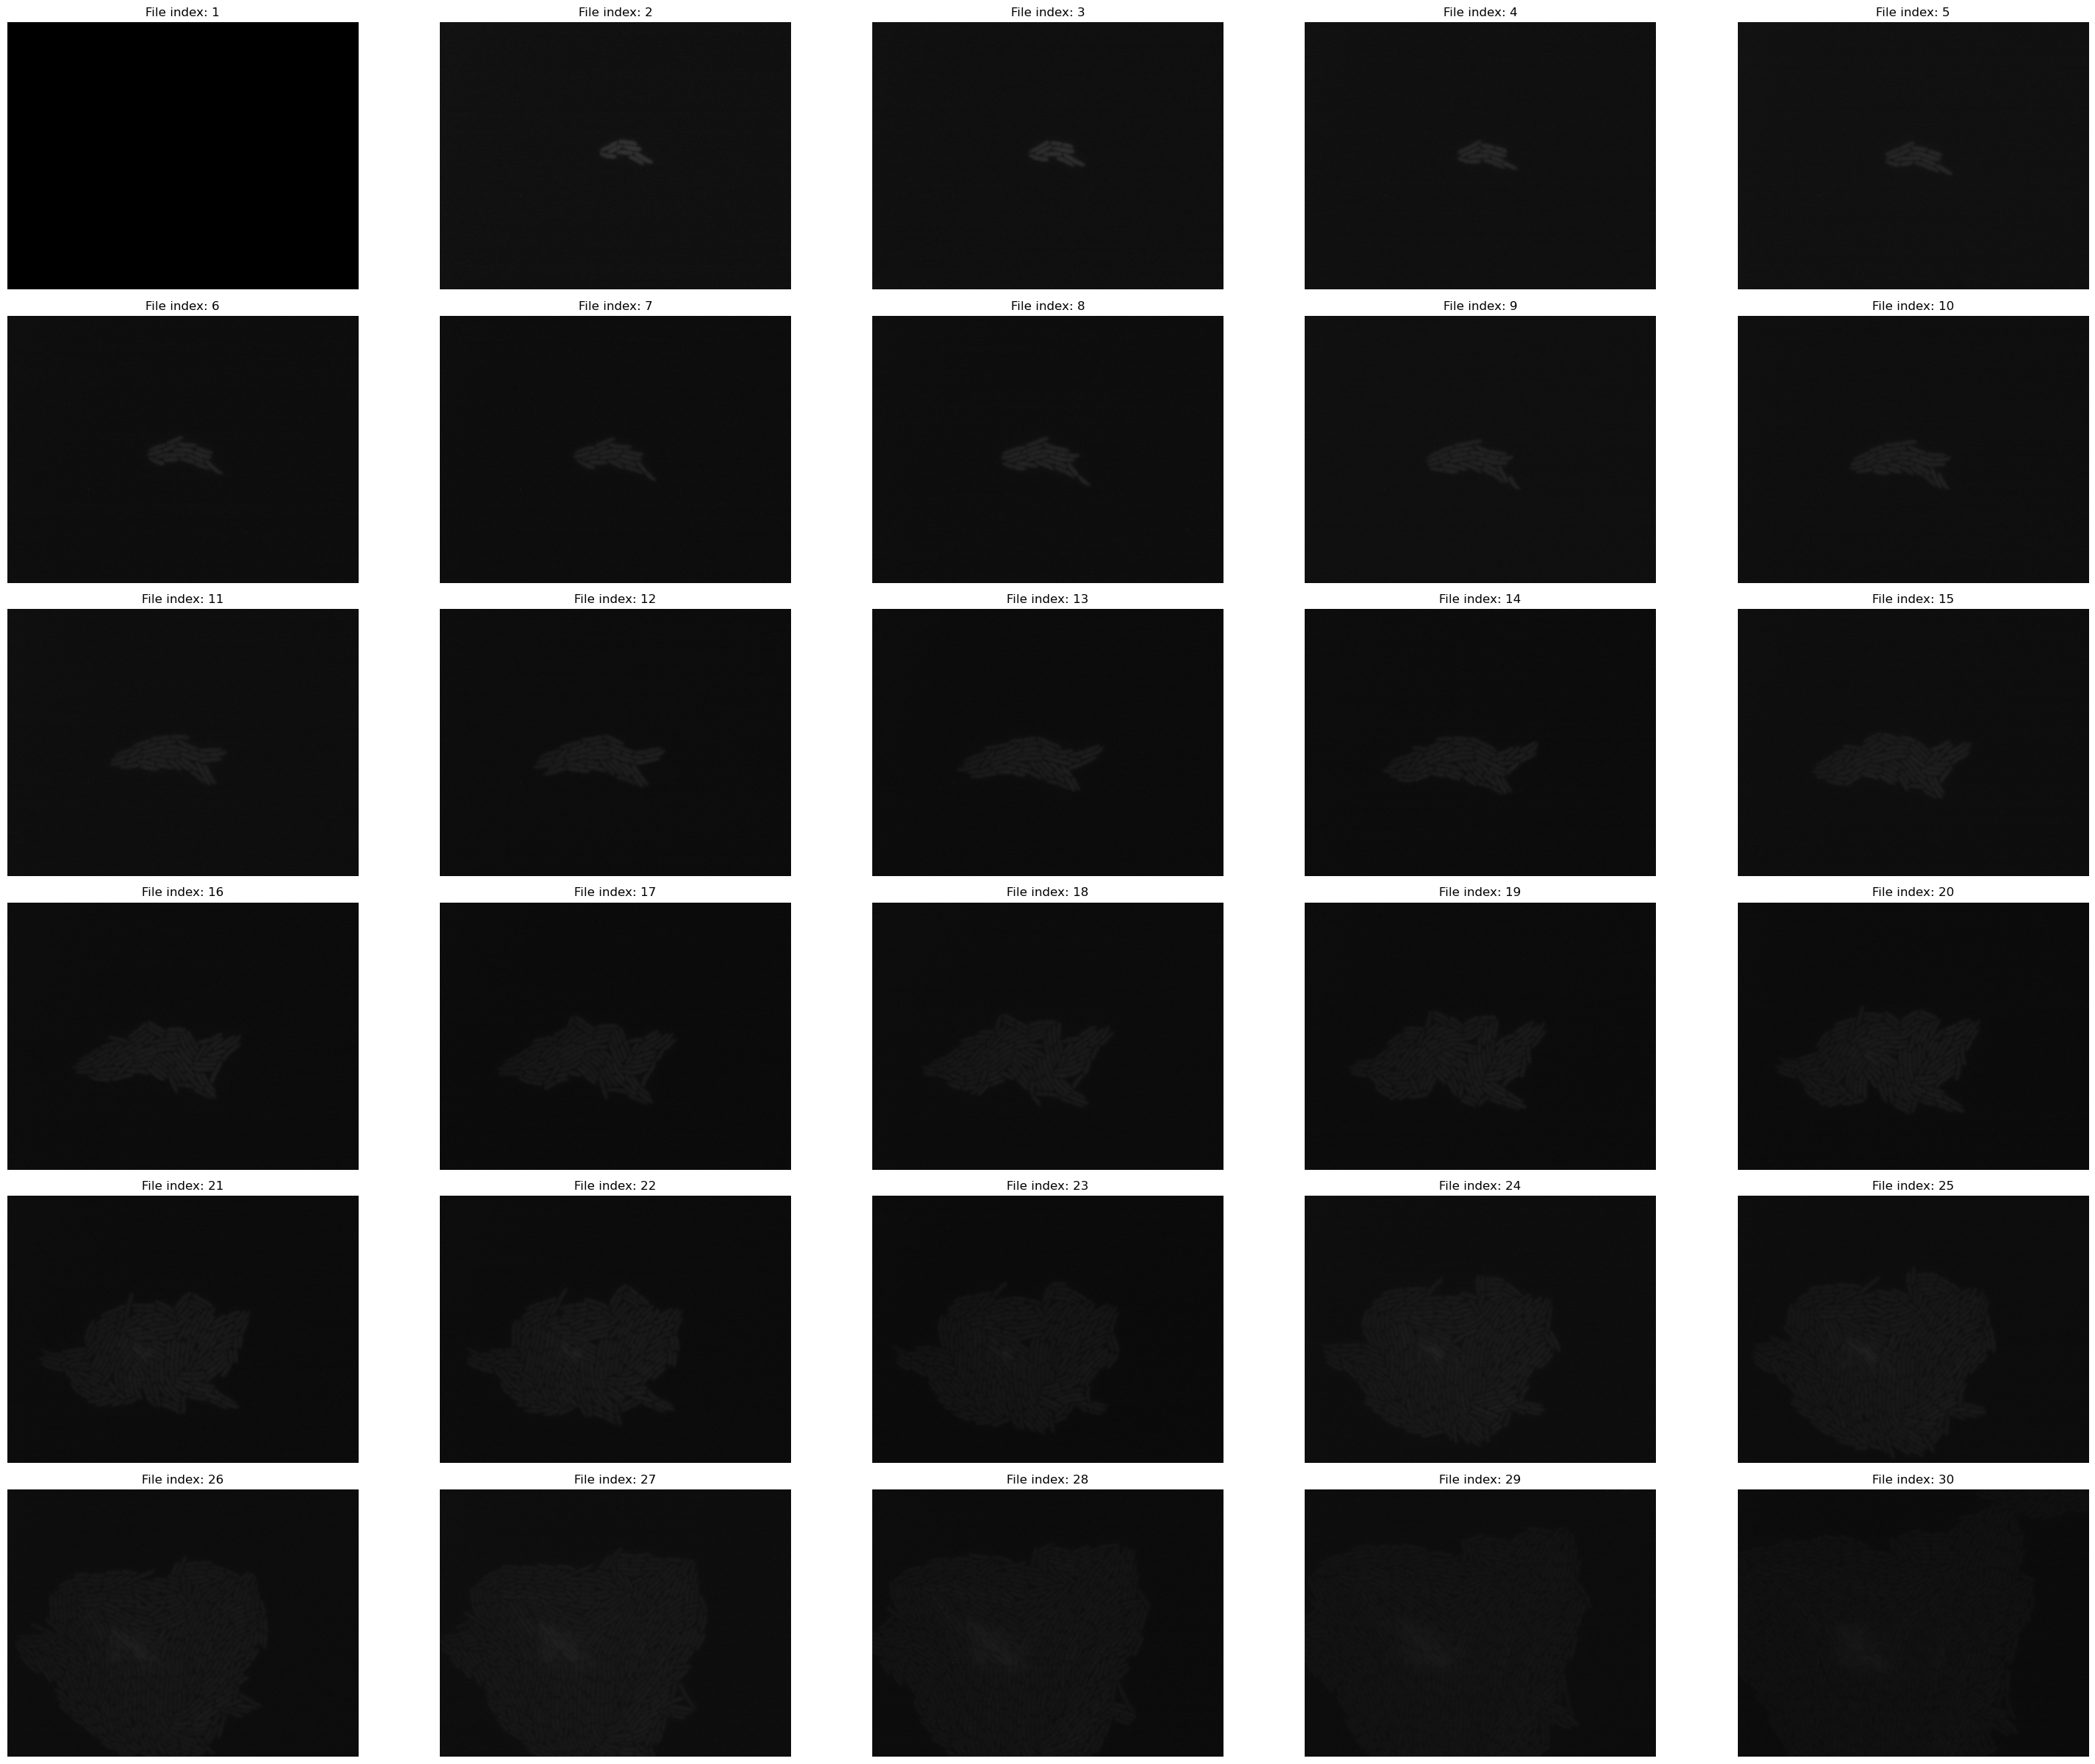

In [7]:
### TO BE DONE BY STUDENT###
# 16 points

fig, ax = plt.subplots(6,5,figsize=(30,24))

for index, image in enumerate(files):
    
    bacteria = skimage.io.imread(image)
    ax[index//5,index%5].imshow(bacteria,cmap='gray') # it is a gray scale image as it has shape of size 2
    ax[index//5,index%5].axis('off')
    ax[index//5,index%5].set_title('File index: {}'.format(index+1))
    
    
plt.tight_layout()
plt.show()

The result is not too good... we can only see a faint shadow in some of the images.

Let's have a closer look at image with index 15:

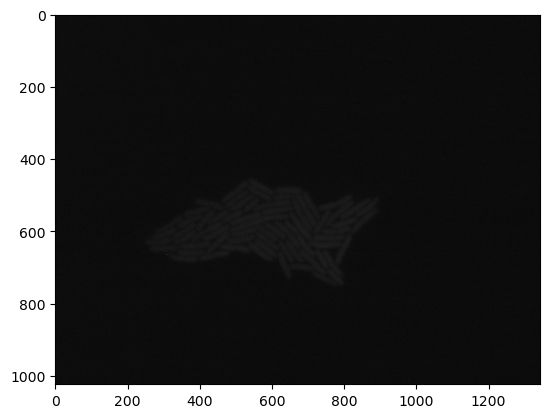

In [8]:
im = skimage.io.imread(files[15])
plt.imshow(im, cmap='gray')

Let's zoom to see only the center of the image, rows 550 to 650 and columns 400 to 500

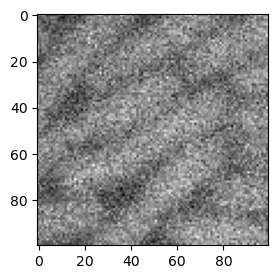

In [9]:
### TO BE DONE BY STUDENT###
# 2 points

plt.figure(figsize=(3,3))
plt.imshow(im[550:650,400:500], cmap="gray")


And the top left 100x100 pixels

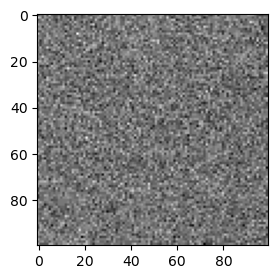

In [10]:
### TO BE DONE BY STUDENT###
# 2 points

plt.figure(figsize=(3,3))
plt.imshow(im[:100,:100], cmap="gray")

In [13]:
print(im.min())
print(im.max())

196
362


## QUESTION: What do you think is the problem with this image?
Explain in the next cell

\### TO BE DONE BY STUDENT###

\# 2 points

**Answer:**

- It seems that there is a lot of noise which makes hard to distinguish pixels with its surroundings.
- With a gray scale this problem seem to intensify.
- There is a clear need to remove the noise from the picture.


## Let's try to improve the quality of the image
Let's apply the following 4x4 filter:

### TO REMOVE THE HIGH FREQUENCIES

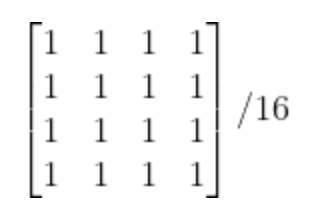

## QUESTION: What is this kind of filter name and what will we achieve applying it? 

\### TO BE DONE BY STUDENT###

\# 2 points

**Answer:** 



- Low pass filtering

A low pass filter is the basis for most smoothing methods. An image is smoothed by decreasing the disparity between pixel values by averaging nearby pixels.

Using a low pass filter tends to retain the low frequency information within an image while reducing the high frequency information. We will use an array of ones divided by the number of elements within the kernel, such as the above 4 by 4 kernel:

Let's apply the filter specified above using ndimage.convolve

In [15]:
### TO BE DONE BY STUDENT###
# 10 points

im = skimage.io.imread(files[15])
kernel = np.ones([4,4])/16

filtered = ndimage.convolve(im, kernel, mode='constant', cval=0.0)

In [19]:
# BEFORE FILTER SCALE
print("Before filter")
print(im.min())
print(im.max())

# AFTER FILTER SCALE
print("\nAfter filter")
print(filtered.min())
print(filtered.max())


Before filter
196
362

After filter
51
216


Let's see how the image looks like now

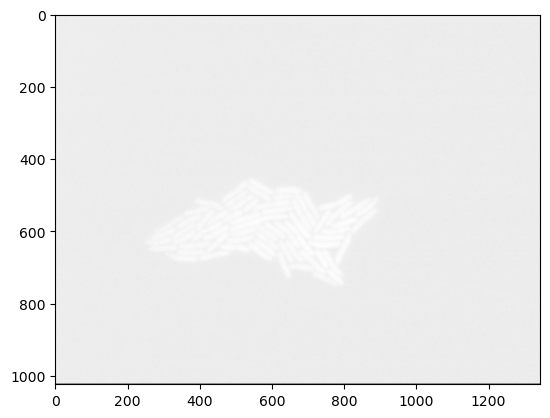

In [20]:
plt.imshow(filtered, cmap='gray')

And repeat the zooms

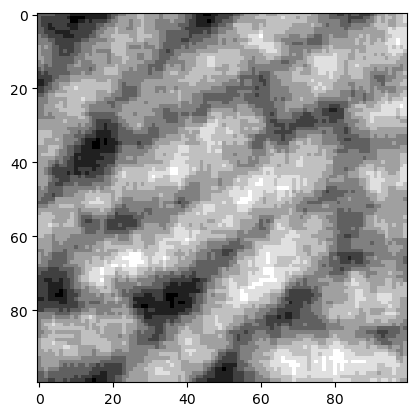

In [21]:
### TO BE DONE BY STUDENT###
# 1 points

plt.imshow(filtered[550:650,400:500], cmap='gray')

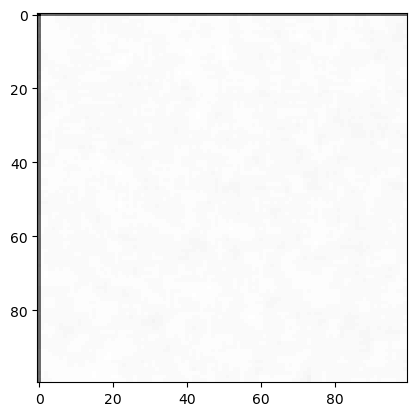

In [22]:
### TO BE DONE BY STUDENT###
# 1 points

plt.imshow(filtered[:100,:100], cmap='gray')

To fullly separate the pixels from the bacteria from the background let's convert the image into a binary image and for that we need to find the thershold.

To do that let's plot the histogram of the image so we can identify hot to isolate the pixels with relevant informations (use skimage.exposure.histogram).

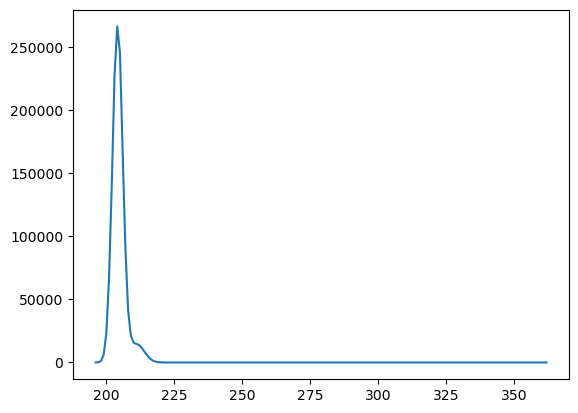

In [39]:
### TO BE DONE BY STUDENT###
# 5 points
from skimage.exposure import histogram

image = im.flatten()

hist, bin_centers = histogram(image)

plt.plot(bin_centers, hist)


There is a very tall peak that makes it difficult to read the lower values of the chart. To improve the chart understanding let's display it in logarithmic scale

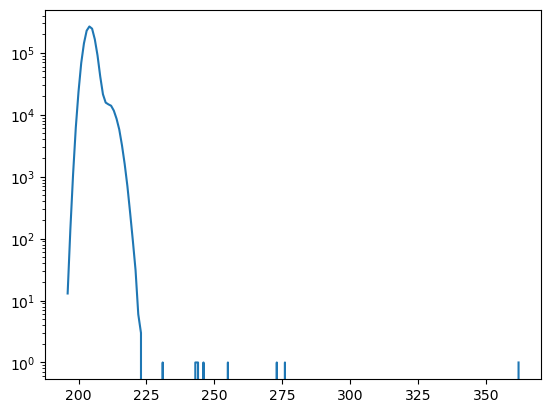

In [37]:
### TO BE DONE BY STUDENT###
# 5 points

plt.yscale('log')
plt.plot(bin_centers, hist)


It Looks like all information is in the last bins of the histogram. Let's visualize only the last 20 bins

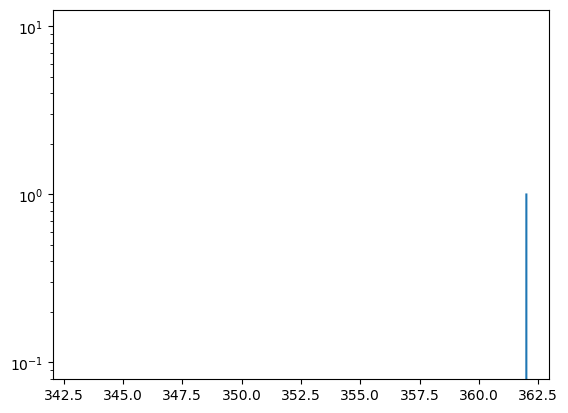

In [40]:
### TO BE DONE BY STUDENT###
# 5 points

plt.yscale('log')
plt.plot(bin_centers[-20:], hist[-20:])


In this histogram we can see 2 peaks, one of them corresponds to the background noise (the higher peak) and the other are the pixels corresponding to the bacteria. We will use a threshold value of 205. Create a binary image (from the filtered image).

In [34]:
### TO BE DONE BY STUDENT###
# 5 points

def get_binary(img, thr):
    bin_img = (img > thr)*1
    return bin_img

binary_im = get_binary(filtered, 205)

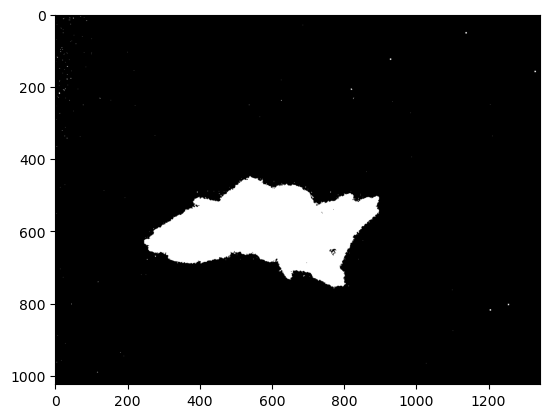

In [35]:
plt.imshow(binary_im, cmap = 'gray')

Now let's create a function that transforms the images. The function should accept an image and should perform the convolution (filter) and create the binary image from it (with the threshold we have found before). The function shoud return the binary image.

In [43]:
### TO BE DONE BY STUDENT###
# 2 points

def img_prepare(im):
    
    # 1st step: convolution (filter)
    kernel = np.ones([4,4])/16
    filtered = ndimage.convolve(im, kernel,mode='constant', cval=0.0)

    # 2nd step: generating binary image from it (with threshold = 206 to get the target image)
    bin_img = (filtered > 206)*1

    return bin_img

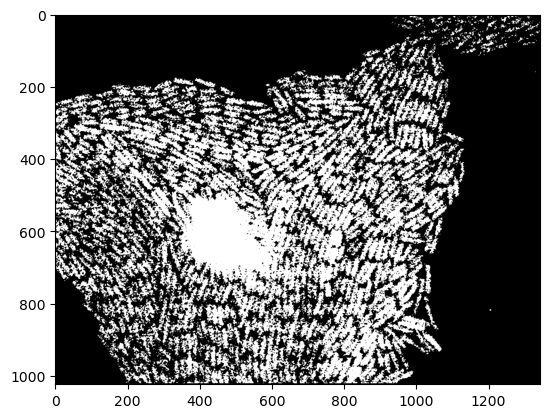

In [44]:
im = skimage.io.imread(files[29])
im_prep = img_prepare(im)

plt.imshow(im_prep, cmap = 'gray')

Using this function let's display all images with the same grid we used before

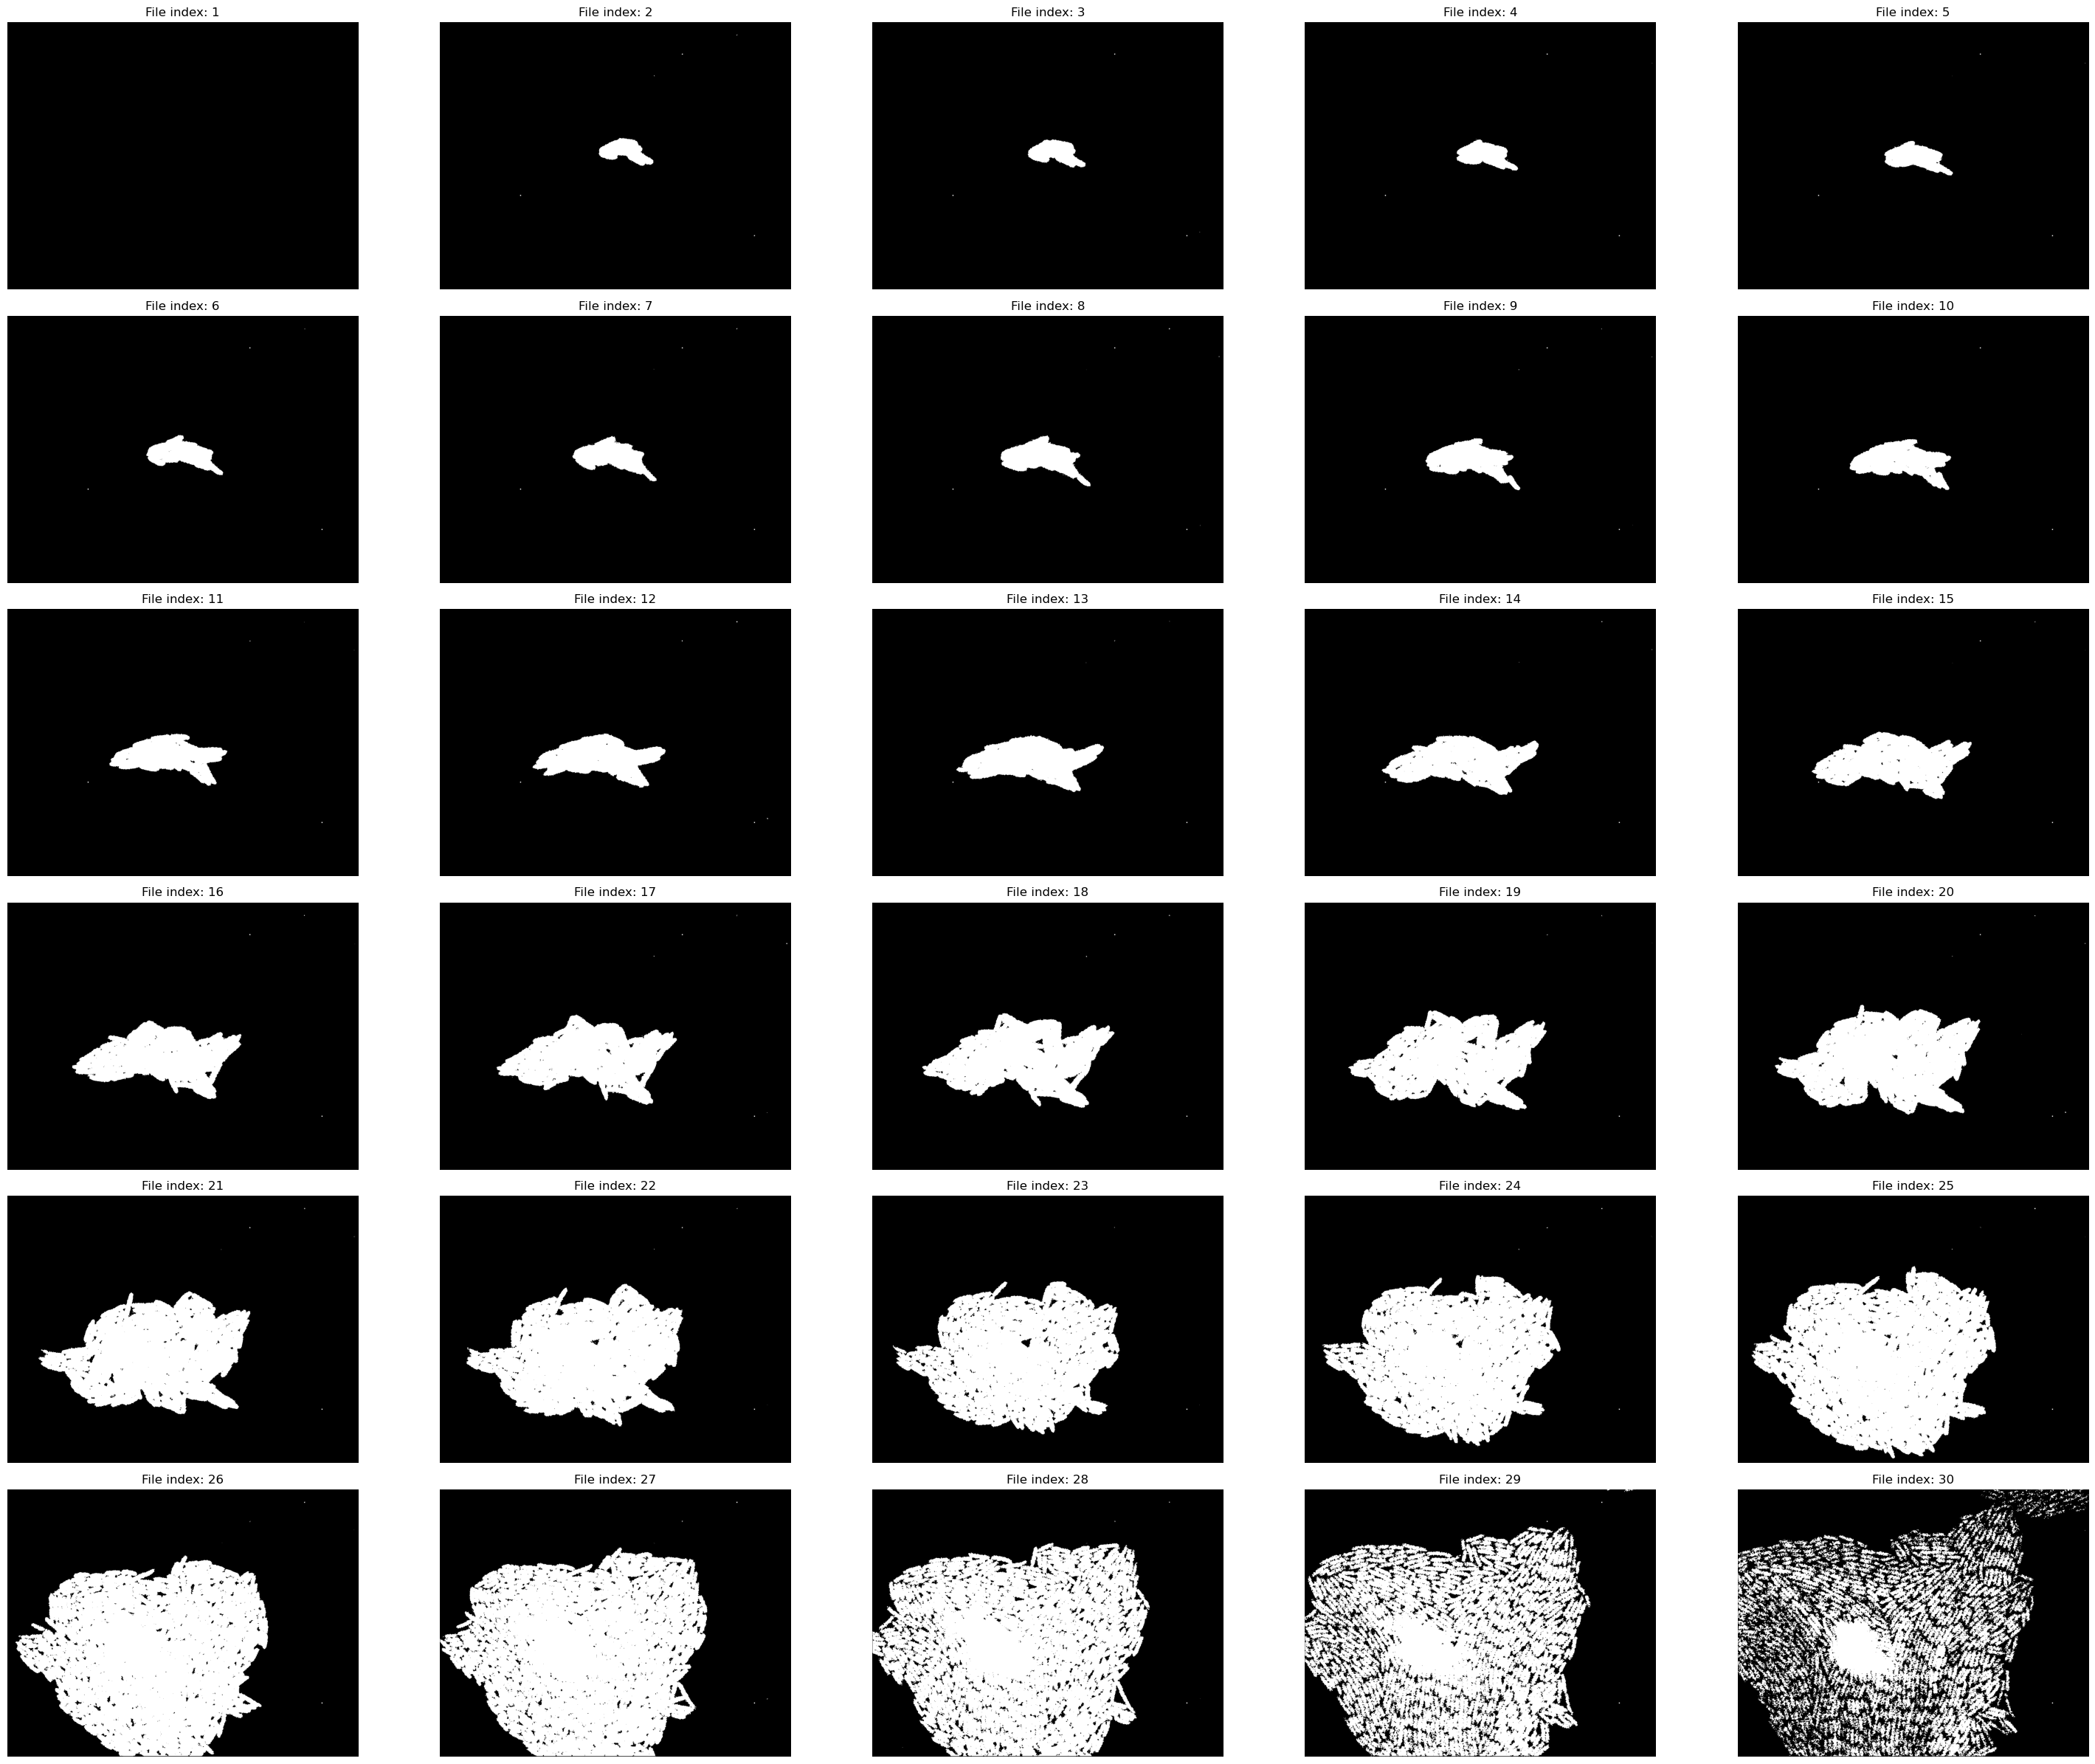

In [45]:
### TO BE DONE BY STUDENT###
# 3 points

fig, ax = plt.subplots(6,5,figsize=(30,24))

for index, image in enumerate(files):
    
    bacteria = skimage.io.imread(image)
    im_prep = img_prepare(bacteria)
    ax[index//5,index%5].imshow(im_prep,cmap='gray') # it is a gray scale image as it has shape of size 2
    ax[index//5,index%5].axis('off')
    ax[index//5,index%5].set_title('File index: {}'.format(index+1))
    
    
plt.tight_layout()
plt.show()


As we said at the beginning we are interested in calculating the doubling time, what is related to the growth rate. This means we are interested in knowing the size of the population in every image. This could be achieved counting the number of bacteria. This is not possible as with the images we have we can't efectively separate them in the image. Another method (considering we can assume they are all the same size) is to calculate the surface the bacteria population occupies. We can do this by just counting the active pixels in the binary image.

Create a function that accepts a binary image and returns the area in pixels of the bacteria

In [46]:
### TO BE DONE BY STUDENT###
# 2 points

def bacteria_area(im_prep):
    active_pixels = im_prep.flatten().sum()
    
    return active_pixels

In [47]:
im = skimage.io.imread(files[10])
im_prep = img_prepare(im)
print('The area in pixels of bacteria population in image 10 is: {}'.format(bacteria_area(im_prep)))

The area in pixels of bacteria population in image 10 is: 46047


Now let's calculate the area for all images. 

Steps:

1.- Create a numpy array of the length of the files list initialized with 0s

2.- Loop through the files and for each of them 

    - Get the binary image using the function you created earlier
    - Calculate the area
    - Store it in the correpsonding position in the np array you created

In [73]:
### TO BE DONE BY STUDENT###
# 3 points


array = np.array(files.copy()) # numpy array containing the images

for index, file in enumerate(array): 
    gray_image = skimage.io.imread(file) # turning the files into gray scale images
    bin_image = img_prepare(gray_image) # using our image preparation function to get a binary image
    area_image = bacteria_area(bin_image) # using our bacteria area function to determine the area for each image
    array[index]=area_image # storing the area in the same index of the numpy array

bact_area = array.astype(float) # turning each item into a float
     

In [76]:
print(bact_area)

[     0.  12301.  14110.  15656.  18142.  21702.  25477.  29989.  34149.
  39442.  46047.  54889.  65098.  75270.  87020. 103761. 122149. 143421.
 167412. 199610. 230966. 272729. 312182. 368549. 433751. 504929. 570307.
 615519. 608579. 462243.]


Let's display these values in a chart. In the x axis we should have time (remember these images were taken with 5 minutes difference) and the area in pixels in the ye axis

Text(0, 0.5, 'cell area [pixels]')

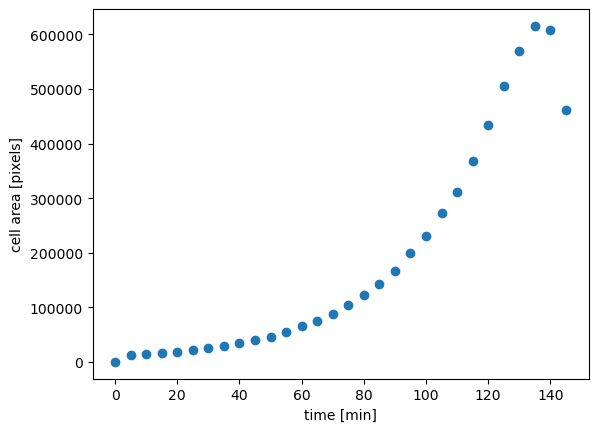

In [108]:
### TO BE DONE BY STUDENT###
# 5 points

xaxis = np.arange(0,len(bact_area))*5
yaxis = bact_area

plt.scatter(xaxis,yaxis)
plt.xlabel("time [min]")
plt.ylabel("cell area [pixels]")



Good!! We are observing the exponential growth we were expecting!! There seems to be an issue with the last 3 images and also the first one is not useful for our goal as it is empty. Let's discard them! 

Let's create another array excluding the last 3 images (outliers) and the first one.

In [109]:
### TO BE DONE BY STUDENT###
# 2 points

bact_area_wo = bact_area[1:-3]

In [110]:
bact_area_wo

array([ 12301.,  14110.,  15656.,  18142.,  21702.,  25477.,  29989.,
        34149.,  39442.,  46047.,  54889.,  65098.,  75270.,  87020.,
       103761., 122149., 143421., 167412., 199610., 230966., 272729.,
       312182., 368549., 433751., 504929., 570307.])

Text(0, 0.5, 'cell area [pixels]')

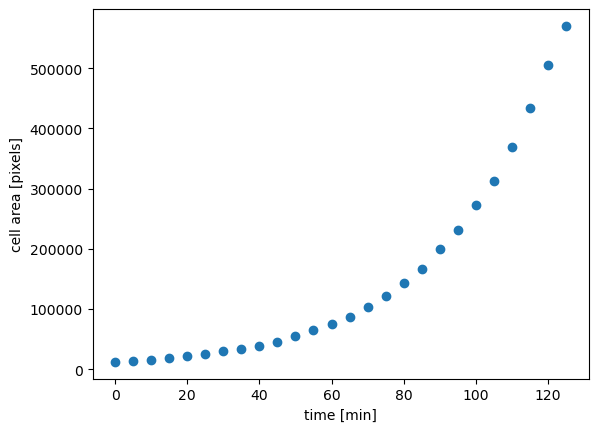

In [157]:
### TO BE DONE BY STUDENT###
# 3 points

xaxis = np.arange(0,len(bact_area)-4)*5
yaxis = bact_area_wo

plt.scatter(xaxis,yaxis)
plt.xlabel("time [min]")
plt.ylabel("cell area [pixels]")


Now that we have the empirical growth every five minutes we need to find the doubling time. To do this we need to do several things.

First find a value of r in the formula we saw at the beginning that adjusts this data best.

This is the formula as a reminder:

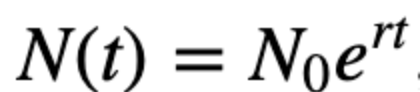

N0 is the size (in our case size in pixels) of the population at the beginning (bact_area_wo[0]).

As you can see below there is one value of r for which this formula will match our data almost perfectly and others that will have bigger errors:

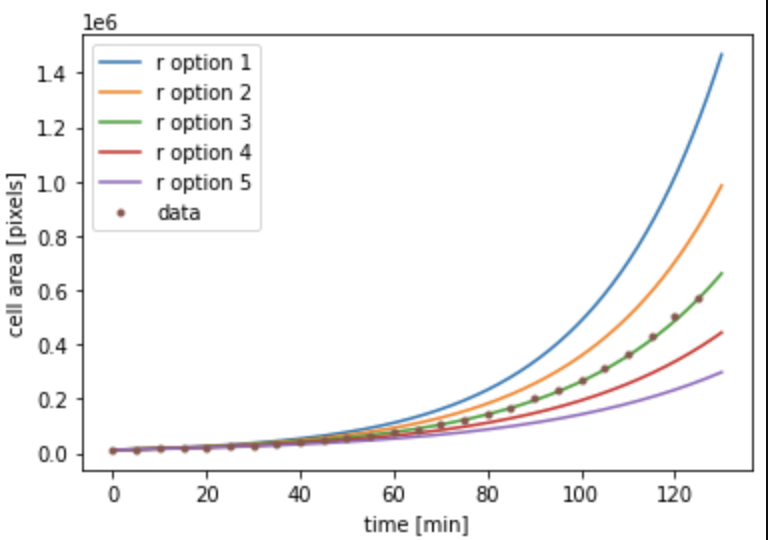

Finding this optimum r in data with an exponential behaviour is the job of a logistic regression. But this time we will do it with our own code so we understand the intuitions.

We first need a formula to calculate the error involved for a particular value of r. We will use this one:

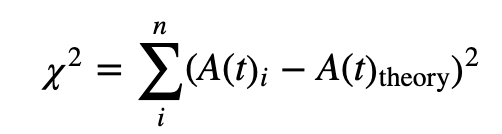

This is often called the Chi-squared statistic. n  is the number of data points and A(t)theory is the expected cellular area at time t, given by our model of exponential growth (the abouve formula) for a given value of r. A(t) is the data we have obtained from the images. We will try for 200 values of r between 0 and 0.1. For each of the values of r we will calculate the theoretical value of the area at each time an image has been taken, and apply the chi error formula. We store the chi errors for the 200 values of r and we will use the value of r with the lowest index. 

1.- Create an r_range numpy array with 200 values between 0 and 0.1 (tip: linspace)

In [102]:
### TO BE DONE BY STUDENT###
# 2 points
# Define the range of growth rates. 

r_range = np.linspace(0,0.1,200)

In [105]:
r_range.shape

(200,)

2.- Create a numpy array initialized with 0, with the same size as the above r_range where we will store the error for each value of r. Call it chi_sq.

In [114]:
### TO BE DONE BY STUDENT###
# 2 points
# Set up an empty vector to store the chi squared value
chi_sq = np.zeros(r_range.shape[0])

In [115]:
chi_sq.shape

(200,)

3.- Loop through the values of r in r_range and for each value of r do_
    - Calculate the theoretical value of the area (theo) using the N(t) formula. 
    - Calculate and store the chi squared error for that value of r

In [131]:
### TO BE DONE BY STUDENT###
# 4 points
time_range = np.arange(0, len(bact_area_wo)) * 5 
# Iterate through each possible growth rate. 
for i in range(len(r_range)):
    # Compute the theoretical value at each time point. 
    theo = bact_area_wo[0] * np.exp(r_range[i] * time_range)
    
    # Compute the sum squared residuals. 
    chi_sq[i] = sum((theo - bact_area_wo)**2)

In [137]:
chi_sq

array([1.17804512e+12, 1.17337481e+12, 1.16845996e+12, 1.16328783e+12,
       1.15784509e+12, 1.15211774e+12, 1.14609115e+12, 1.13975001e+12,
       1.13307828e+12, 1.12605925e+12, 1.11867543e+12, 1.11090862e+12,
       1.10273982e+12, 1.09414928e+12, 1.08511645e+12, 1.07562002e+12,
       1.06563789e+12, 1.05514719e+12, 1.04412428e+12, 1.03254481e+12,
       1.02038374e+12, 1.00761537e+12, 9.94213403e+11, 9.80151044e+11,
       9.65401071e+11, 9.49935955e+11, 9.33727998e+11, 9.16749497e+11,
       8.98972941e+11, 8.80371240e+11, 8.60918002e+11, 8.40587851e+11,
       8.19356799e+11, 7.97202679e+11, 7.74105653e+11, 7.50048789e+11,
       7.25018737e+11, 6.99006498e+11, 6.72008321e+11, 6.44026718e+11,
       6.15071639e+11, 5.85161808e+11, 5.54326259e+11, 5.22606084e+11,
       4.90056427e+11, 4.56748758e+11, 4.22773467e+11, 3.88242808e+11,
       3.53294251e+11, 3.18094290e+11, 2.82842772e+11, 2.47777801e+11,
       2.13181314e+11, 1.79385394e+11, 1.46779434e+11, 1.15818247e+11,
      

Let's plot now the error for each value of r

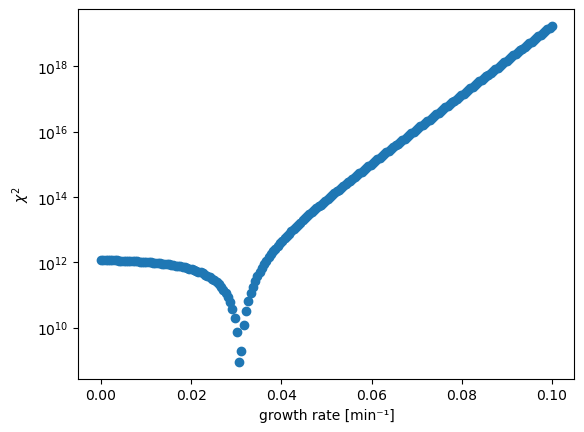

In [147]:
### TO BE DONE BY STUDENT###
# 4 points
# Plot the chisq statistic
xaxis = r_range
yaxis = chi_sq

plt.scatter(xaxis,yaxis)

plt.ylabel("$\\chi^2$")
plt.xlabel("growth rate [min\u207B\u00B9]")
plt.yscale('log')




We can easily see there is a clear minimum (a valu of r with the lowest error). Let's identify this value, finding the index with the minimum value (np.argmin) and then geting the value at this index.

In [153]:
### TO BE DONE BY STUDENT###
# 2 points
# Find the minimum of the chi_sq. 

index_min_chi_sq = np.argmin(chi_sq)
r_for_index_min_chi_sq = r_range[index_min]
print("The index at the minimum is {} min^-1.".format(r_for_index_min_chi_sq))

The index at the minimum is 0.030653266331658293 min^-1.


Let's display in a chart the formula with the calculated value of r and the area obtained from the images.

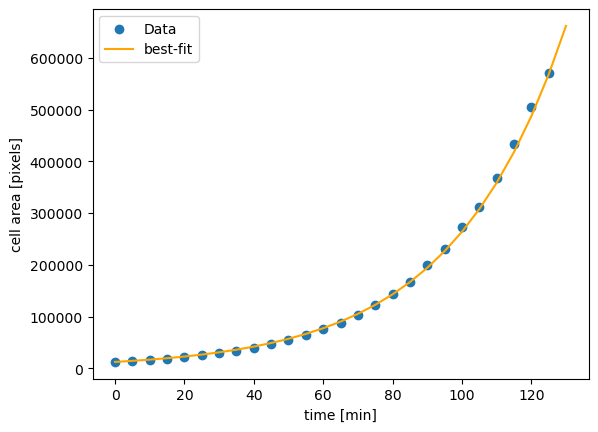

In [168]:
### TO BE DONE BY STUDENT###
# 4 points
# Compute the best fit

time_range = np.arange(0, len(bact_area_wo)+1) * 5 


xaxis = np.arange(0,len(bact_area)-4)*5
yaxis = bact_area_wo

plt.scatter(xaxis,yaxis,label='Data')

xaxis = np.arange(0,len(bact_area)-3)*5
yaxis = bact_area_wo[0] * np.exp(r_for_index_min_chi_sq * time_range)

plt.plot(xaxis,yaxis, color='orange', label='best-fit')

plt.xlabel("time [min]")
plt.ylabel("cell area [pixels]")

plt.legend()


Good!! We have a great fit!! now we just need to find the doubling time.

We just need to apply the formula:

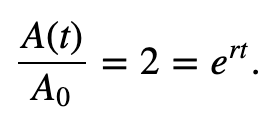

and isolate t. 

So te will be the result of this:

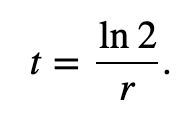

Let's calculate it. (remember that in numpy the natural logarithm is the function np.log)

In [47]:
### TO BE DONE BY STUDENT###
# 2 points

doubling_time = np.log(2)/r_for_index_min_chi_sq
print("The doubling time of the E. Coli bacteria is {} minutes".format(doubling_time))

The doubling time of the E. Coli bacteria is 22.61250638220149 minutes


## let's use the clip method instead

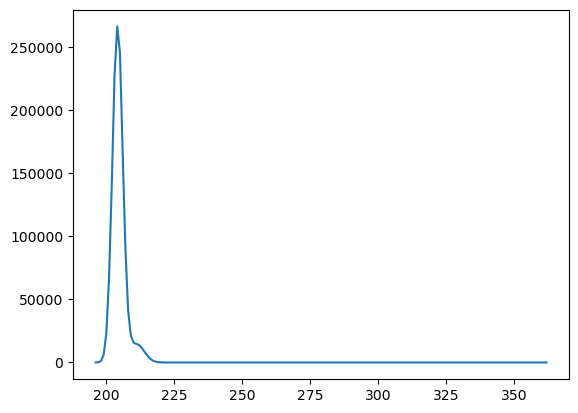

In [55]:
#Let's user other method
from skimage.exposure import histogram

im = skimage.io.imread(files[15])

im_flatten = im.flatten()

hist, bin_centers = histogram(im_flatten)

plt.plot(bin_centers, hist)

In [56]:
im_clipped = np.clip(a=im, a_min=200, a_max=225)

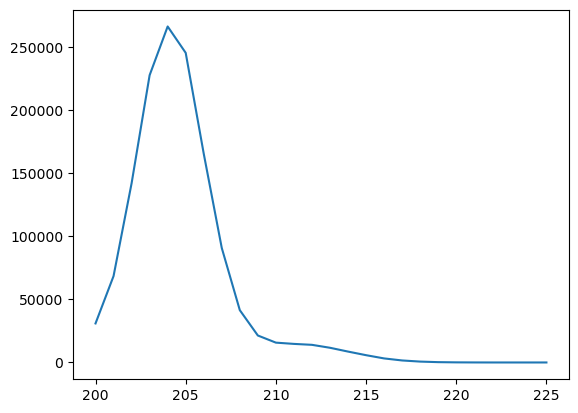

In [57]:
im_clipped_flatten = im_clipped.flatten()

hist, bin_centers = histogram(im_clipped_flatten)

plt.plot(bin_centers, hist)

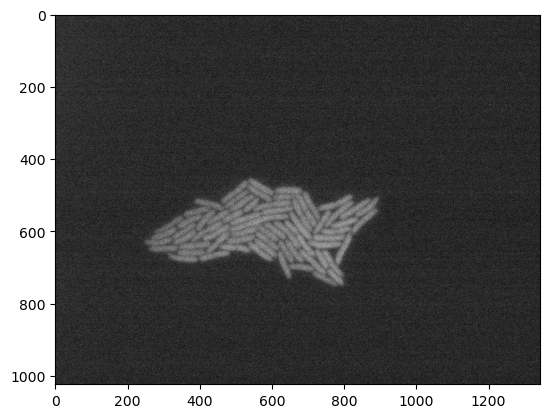

In [58]:
plt.imshow(im_clipped, cmap = "gray")